In [102]:
!export CUDA_VISIBLE_DEVICES=0
#pip install -r requirements.txt
%pip install Pillow requests transformers==4.43.0 accelerate
from PIL import Image  
import requests 
from transformers import AutoModelForCausalLM 
from transformers import AutoModelForCausalLM, AutoTokenizer, pipeline
from transformers import AutoImageProcessor
import torch

huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)
huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)


Note: you may need to restart the kernel to use updated packages.


In [103]:
from transformers import InstructBlipProcessor, InstructBlipForConditionalGeneration
import torch
from PIL import Image
import requests


In [104]:

model = InstructBlipForConditionalGeneration.from_pretrained("Salesforce/instructblip-flan-t5-xl")
processor = InstructBlipProcessor.from_pretrained("Salesforce/instructblip-flan-t5-xl")


Loading checkpoint shards: 100%|██████████| 2/2 [00:01<00:00,  1.37it/s]
Some kwargs in processor config are unused and will not have any effect: num_query_tokens. 


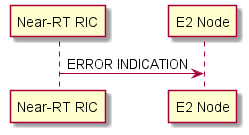

In [105]:

device = "cuda" if torch.cuda.is_available() else "cpu"
model.to(device)

#url = "https://raw.githubusercontent.com/salesforce/LAVIS/main/docs/_static/Confusing-Pictures.jpg"
image = Image.open("Images/O-RAN.WG3.TS.E2AP-R004-v07.00 (1)/page41_img2.png").convert("RGB")
display(image)


The diagram below shows a Near-RT RIC, E2 Node, and E1 Node communicating with each other. The arrows indicate the direction of the arrow and the message text on the arrows. For each interaction, write: - The two entities involved (use their exact names from the diagram). - The direction of the arrow (either right to left or left to right) as shown, from the entity at the tail of the arrow to the entity at the head. - The message text exactly as written on the arrow. - Preserve original spelling, capitalization, and message order from the image.


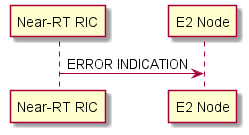

In [130]:


prompt = """
Interactions:
1. [Entity A] → [Entity B]: [Message text]
2. [Entity B] → [Entity A]: [Message text]

Instructions:
- Identify each participant exactly as it appears in the diagram (e.g., "Near-RT RIC", "E2 Node"). Do not use generic placeholders.
- List each interaction in the order shown, describing the direction of the arrow between the two entities and the exact message text on the arrow.
- For each interaction, write:
  - The two entities involved (use their exact names from the diagram).
  - The direction of the arrow (either right to left or left to right) as shown, from the entity at the tail of the arrow to the entity at the head.
  - The message text exactly as written on the arrow.
- Preserve original spelling, capitalization, and message order from the image.
"""

inputs = processor(images=image, text=prompt, return_tensors="pt").to(device)

outputs = model.generate(
        **inputs,
        do_sample=True,
        num_beams=5,
        max_length=256,
        min_length=1,
        top_p=0.9,
        repetition_penalty=0.7,
        length_penalty=1.0,
        temperature= 1.4,
)
generated_text = processor.batch_decode(outputs, skip_special_tokens=True)[0].strip()
print(generated_text)
display(image)